In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.dpi'] = 500
rcParams['savefig.dpi'] = 500
rcParams['font.family'] = 'Arial'
rcParams['font.size'] = 14
rcParams['axes.labelsize'] = 14
rcParams['axes.titlesize'] = 14
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14
rcParams['legend.fontsize'] = 14
rcParams['figure.titlesize'] = 14

In [2]:
categories = ['negative', 'neutral', 'positive', 'unrelated']

p = pd.read_csv('performance/precision.csv')
p[categories] = p[categories].applymap(float)
r = pd.read_csv('performance/recall.csv')
r[categories] = r[categories].applymap(float)
f1 = pd.read_csv('performance/f1_score.csv')
f1[categories] = f1[categories].applymap(float)
a = pd.read_csv('performance/accuracy.csv')
a[['Training', 'Testing']] = a[['Training', 'Testing']].applymap(float)
a['Training'] = a['Training'] * 100
a['Testing'] = a['Testing'] * 100

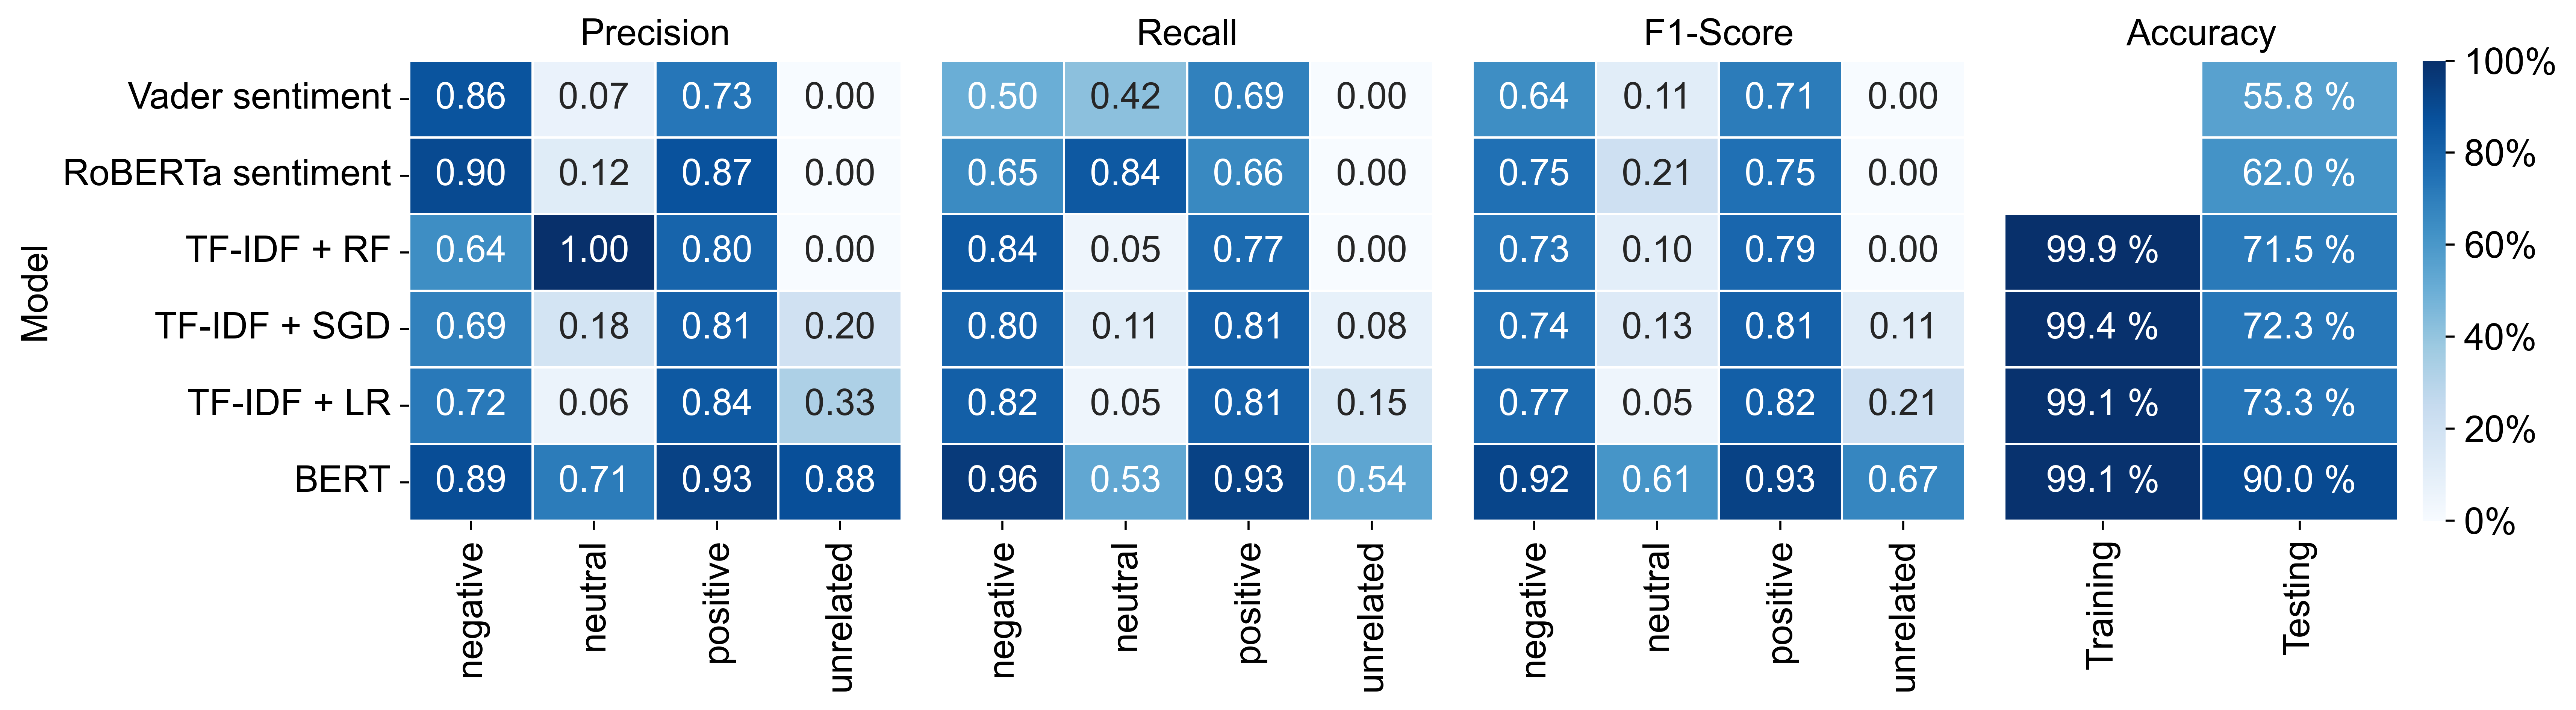

In [3]:
fig, axes = plt.subplots(1, 4, figsize=(14, 4))

# Precision heatmap
pp = p.set_index('Model')
sns.heatmap(pp, annot=True, cmap="Blues", fmt='.2f', xticklabels=True, yticklabels=True,
            cbar=False, ax=axes[0], vmin=0, vmax=1.0, linewidths=0.8, linecolor='white')
axes[0].set_title('Precision')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Recall heatmap
rr = r.set_index('Model')
sns.heatmap(rr, annot=True, cmap="Blues", fmt='.2f', xticklabels=True, yticklabels=False,
            cbar=False, ax=axes[1], vmin=0, vmax=1.0, linewidths=0.8, linecolor='white')
axes[1].set_title('Recall')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_ylabel(None)

# F1-Score heatmap
ff1 = f1.set_index('Model')
sns.heatmap(ff1, annot=True, cmap="Blues", fmt='.2f', xticklabels=True, yticklabels=False,
            cbar=False, ax=axes[2], vmin=0, vmax=1.0, linewidths=0.8, linecolor='white')
axes[2].set_title('F1-Score')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)
axes[2].set_ylabel(None)

# Accuracy heatmap
aa = a.set_index('Model')
sns.heatmap(aa, annot=True, cmap="Blues", fmt='.1f', xticklabels=True, 
            yticklabels=False, ax=axes[3], vmin=0, vmax=100, cbar_kws={'format': '%.0f%%'},
            linewidths=0.8, linecolor='white')
axes[3].set_title('Accuracy')
for t in axes[3].texts: 
    t.set_text(t.get_text() + " %")
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=90)
axes[3].set_ylabel(None)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()